In [114]:
import pandas as pd
import numpy as np

In [115]:
points = ["P1", "P2", "P3", "P4", "P5", "P6", "P7", "P8", "P9", "P10"]
x = [0.4, 0.42, 2.38, 0.91, 0.90, 0.8, 2.1, 1.99, 1.2, 0.47]
y = [0.53, 0.55, 1.5, 0.2, 0.23, 0.18, 1, 0.98, 0.34, 0.11]
df = pd.DataFrame(list(zip(points, x, y)))
df.columns = ["Points", "X", "Y"]
df.head(10)

,Points,X,Y
0,P1,0.40,0.53
1,P2,0.42,0.55
2,P3,2.38,1.50
3,P4,0.91,0.20
4,P5,0.90,0.23
5,P6,0.80,0.18
6,P7,2.10,1.00
7,P8,1.99,0.98
8,P9,1.20,0.34
9,P10,0.47,0.11


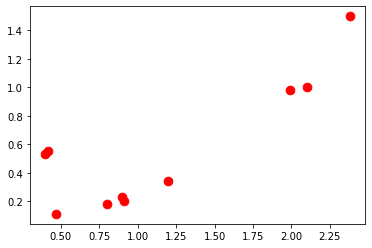

In [116]:
plt.scatter(x, y, c="red", s = 75)

In [117]:
def euclidean_distance(point1, point2): 
    dist = 0
    for i in range(len(point1)):
        dist += (point1[i] - point2[i])**2
    return dist ** 0.5


def single_linkage_distance(cluster1, cluster2): 
    distances = []
    for point1 in cluster1:
        for point2 in cluster2:
            distances.append(euclidean_distance(point1, point2))
    return min(distances)


def complete_linkage_distance(cluster1, cluster2):
    distances = []
    for point1 in cluster1:
        for point2 in cluster2:
            distances.append(euclidean_distance(point1, point2))
    return max(distances)


def average_linkage_distance(cluster1, cluster2):
    distances = []
    for point1 in cluster1:
        for point2 in cluster2:
            distances.append(euclidean_distance(point1, point2))
    return np.mean(distances)

In [118]:
#clusters = [cluster1, cluster2, cluster3]
#cluster1 = [point1, point2, point3]
#point1 = [x, y]

def calc_closest_clusters(clusters, linkage_type):#assuming single linkage 
    min_dist = float("inf")
    closest_clusters = (-1, -1)
    for i in range(len(clusters)):
        for j in range(len(clusters)):
            if i != j:#two different clusters
                cluster1 = clusters[i]
                cluster2 = clusters[j]
                
                if linkage_type == "single":
                    dist = single_linkage_distance(cluster1, cluster2)
                elif linkage_type == "complete":
                    dist = complete_linkage_distance(cluster1, cluster2)
                elif linkage_type == "average":
                    dist = average_linkage_distance(cluster1, cluster2)
                    
                if(dist < min_dist):
                    min_dist = dist
                    closest_clusters = (i, j)
                    
    return closest_clusters

In [119]:
clusters = []
for i in range(0, 10):
    clusters.append([[x[i], y[i]]])

In [120]:
clusters #each point is in its own cluster

[[[0.4, 0.53]],
 [[0.42, 0.55]],
 [[2.38, 1.5]],
 [[0.91, 0.2]],
 [[0.9, 0.23]],
 [[0.8, 0.18]],
 [[2.1, 1]],
 [[1.99, 0.98]],
 [[1.2, 0.34]],
 [[0.47, 0.11]]]

In [121]:
def hierarchical_clustering(df, num_itrs, linkage_type):
    clusters = []
    
    for point in df.values:
        clusters.append([[point[1], point[2]]])
        
    itr = 0
    while(len(clusters) > 1 and itr < num_itrs):
        clusters_to_merge = calc_closest_clusters(clusters, linkage_type)
        new_clusters = []
        for i in range(len(clusters)):
            if i not in clusters_to_merge:
                new_clusters.append(clusters[i])
        merged_cluster = clusters[clusters_to_merge[0]]
        for point in clusters[clusters_to_merge[1]]:
            merged_cluster.append(point)
        new_clusters.append(merged_cluster)
        clusters = new_clusters
        itr += 1
        
    
    return clusters

## Single Linkage

In [122]:
clustered_pts = hierarchical_clustering(df, 6, "single")

In [123]:
clustered_pts

[[[2.38, 1.5]],
 [[0.4, 0.53], [0.42, 0.55]],
 [[2.1, 1.0], [1.99, 0.98]],
 [[0.47, 0.11], [1.2, 0.34], [0.8, 0.18], [0.91, 0.2], [0.9, 0.23]]]

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

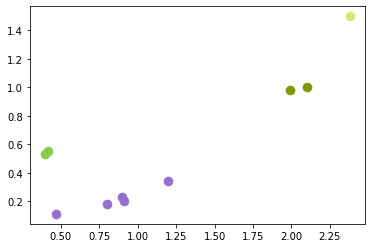

In [124]:
import matplotlib.pyplot as plt

for cluster in clustered_pts:
    x_pts = []
    y_pts = []
    for point in cluster:
        x_pts.append(point[0])
        y_pts.append(point[1])
    plt.scatter(x_pts, y_pts, c=np.random.rand(3,), s = 75)

## Complete Linkage

In [125]:
clustered_pts = hierarchical_clustering(df, 6, "complete")

In [126]:
clustered_pts

[[[2.38, 1.5]],
 [[2.1, 1.0], [1.99, 0.98]],
 [[1.2, 0.34], [0.8, 0.18], [0.91, 0.2], [0.9, 0.23]],
 [[0.47, 0.11], [0.4, 0.53], [0.42, 0.55]]]

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


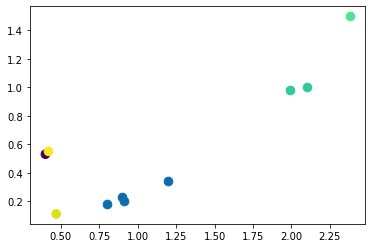

In [127]:
import matplotlib.pyplot as plt

for cluster in clustered_pts:
    x_pts = []
    y_pts = []
    for point in cluster:
        x_pts.append(point[0])
        y_pts.append(point[1])
    plt.scatter(x_pts, y_pts, c=np.random.rand(3,), s = 75)

## Average Linkage

In [128]:
clustered_pts = hierarchical_clustering(df, 6, "average")

In [129]:
clustered_pts

[[[2.38, 1.5]],
 [[2.1, 1.0], [1.99, 0.98]],
 [[1.2, 0.34], [0.8, 0.18], [0.91, 0.2], [0.9, 0.23]],
 [[0.47, 0.11], [0.4, 0.53], [0.42, 0.55]]]

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


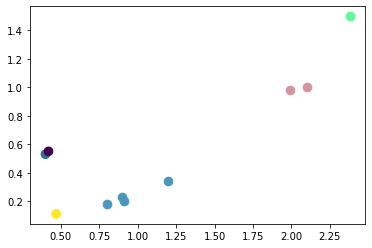

In [130]:
import matplotlib.pyplot as plt

for cluster in clustered_pts:
    x_pts = []
    y_pts = []
    for point in cluster:
        x_pts.append(point[0])
        y_pts.append(point[1])
    plt.scatter(x_pts, y_pts, c=np.random.rand(3,), s = 75)

## Dendrogram

In [131]:
points = []
for i in range(10):
    points.append([x[i], y[i]])
points = np.array(points)
print(np.array(points))

[[0.4  0.53]
 [0.42 0.55]
 [2.38 1.5 ]
 [0.91 0.2 ]
 [0.9  0.23]
 [0.8  0.18]
 [2.1  1.  ]
 [1.99 0.98]
 [1.2  0.34]
 [0.47 0.11]]


In [132]:
import plotly.figure_factory as ff

fig = ff.create_dendrogram(points)
fig.update_layout(width=800, height=500)
fig.show()